# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
print(df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


If we apply .shape on the dataset, Pandas returns us a pair of numbers that represent the dimensionality of our dataset. This property is very useful for understanding the number of columns and the length of the dataset.

In [3]:
df.shape

(541909, 8)

The describe function does exactly this: it provides purely descriptive information about the dataset. This information includes statistics that summarize the central tendency of the variable, their dispersion, the presence of empty values and their shape.

In [4]:
df.describe() # basic statistics of the dataset

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Unlike .describe(), .info() gives us a shorter summary of our dataset. It returns us information about the data type, non-null values and memory usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


To check for duplicate rows we can use .isduplicated().sum()— this will print us the number of duplicated rows in our dataset

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


In [8]:
df.count() 

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

Dropping the duplicate rows

In [13]:
df = df.drop_duplicates()
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

Dropping the missing or null values.

In [15]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [16]:
df = df.dropna()    # Dropping the missing values.
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

Now we have removed all the rows which contain the Null or N/A values

In [17]:
print(df.isnull().sum())   # After dropping the values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


 Measures of central tendency and dispersion

In [18]:

print(df.mean())

Quantity         12.183273
UnitPrice         3.474064
CustomerID    15281.160818
dtype: float64


In [19]:
print(df.median())

Quantity          5.00
UnitPrice         1.95
CustomerID    15145.00
dtype: float64


In [20]:
print(df.mode().iloc[0])

InvoiceNo                                  576339
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        1
InvoiceDate                   2011-11-14 15:27:00
UnitPrice                                    1.25
CustomerID                                  17841
Country                            United Kingdom
Name: 0, dtype: object


In [21]:
print(df.var())

Quantity      6.264160e+04
UnitPrice     4.867021e+03
CustomerID    2.937817e+06
dtype: float64


In [22]:
print(df.std())

Quantity       250.283037
UnitPrice       69.764035
CustomerID    1714.006089
dtype: float64


In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])#Converting a date column to datetime format

In [30]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')# Adding a column for the month and year

Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

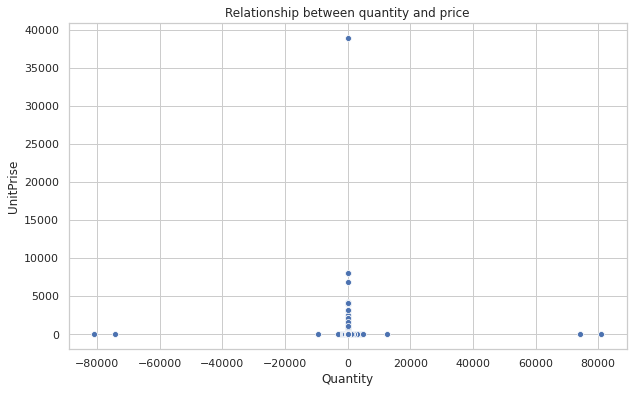

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Relationship between quantity and price')
plt.xlabel('Quantity')
plt.ylabel('UnitPrise')
plt.show()

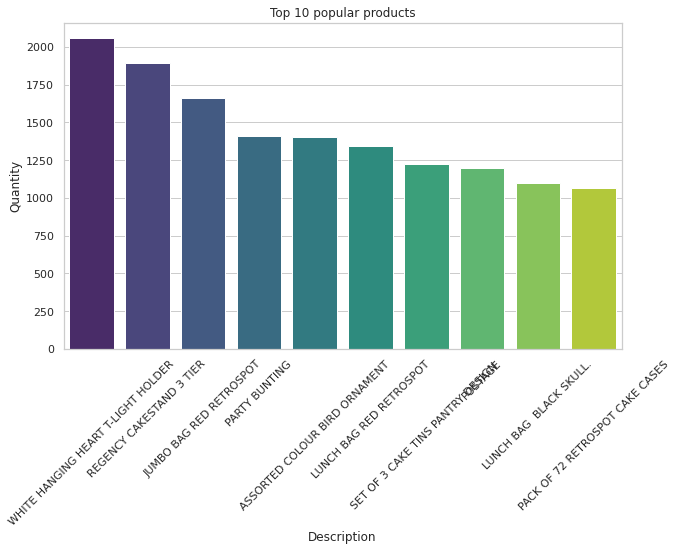

In [38]:
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 popular products')
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Quantity')

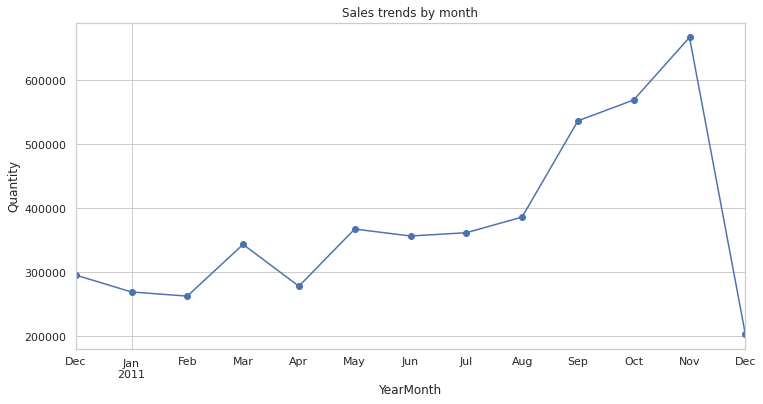

In [39]:
monthly_sales = df.groupby('YearMonth')['Quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Sales trends by month')
plt.xlabel('YearMonth')
plt.ylabel('Quantity')

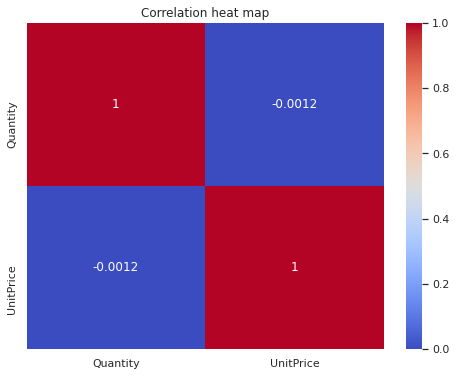

In [40]:
numeric_df = df[['Quantity', 'UnitPrice']]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heat map')
plt.show()

The heat map is useful because it allows us to efficiently grasp which variables are strongly correlated with each other.

This boxplot helps visualize the distribution of product quantities across different countries, including potential outliers.

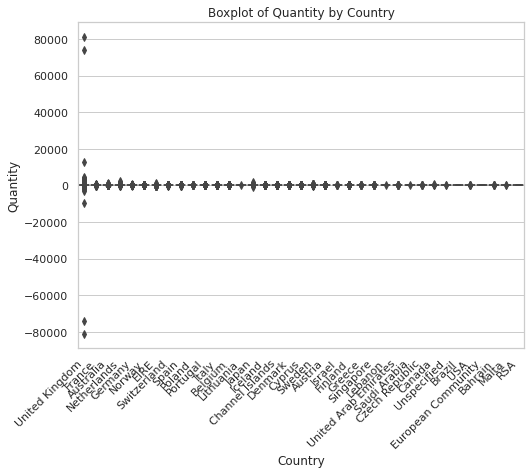

In [50]:
# Create a boxplot for the 'Quantity' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='Quantity', data=df)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity by Country')
plt.xticks(rotation=45, ha='right')
plt.show()

This helps visualize the distribution of product prices across different countries and identify any significant price variations

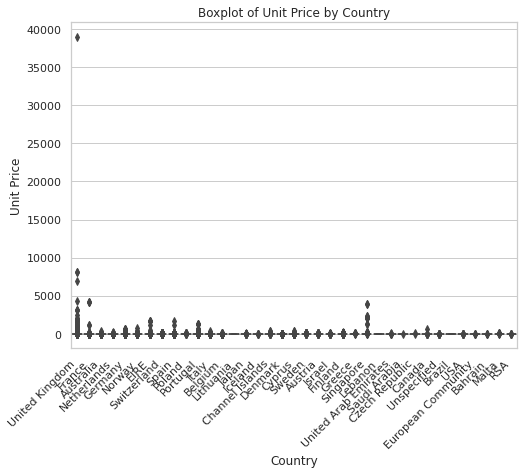

In [51]:
# Create a boxplot for the 'UnitPrice' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='UnitPrice', data=df)
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.title('Boxplot of Unit Price by Country')
plt.xticks(rotation=45, ha='right')
plt.show()

Key Observations from the Boxplots:

Quantity:
You can identify countries with significantly higher or lower average quantities sold per transaction.
Look for outliers, which might indicate unusual orders or potential data issues.
Unit Price:
Observe variations in average unit prices across different countries.
Identify countries with higher or lower price ranges for products.

This approach will help you gain insights into the distribution of product quantities and unit prices across different countries, which can be valuable for understanding your sales patterns and making informed business decisions.